# Exploratory Data Analysis - Unified Dataset

This notebook provides comprehensive EDA for the unified hate speech detection dataset that combines HateXplain and ToxiGen data, filtered for **LGBTQ, Mexican, and Middle East** target groups.

## Analysis Overview

1. **Dataset Loading & Basic Statistics** - Overview of dataset composition and key metrics
2. **Row Counts & Distribution Analysis** - Detailed split and source distribution statistics
3. **Split Distribution Visualization** - Train/validation/test split analysis with visualizations
4. **Label Distribution Analysis** - Binary and multiclass label distributions with target group analysis
5. **Missingness Analysis** - Overall data completeness assessment with pie chart visualization
6. **Text Length Profile Analysis** - Character and token count distributions by source and label
7. **Duplicates Analysis** - Comprehensive duplicate detection including exact and near-duplicate analysis
8. **Data Quality Assessment** - Overall dataset quality evaluation and comprehensive recommendations

## 🎯 Key Findings Summary

### ✅ **Dataset Composition & Quality**
- **Total Entries**: 64,321 samples filtered to 3 target groups (LGBTQ, Mexican, Middle East)
- **Target Group Balance**: Well-distributed (35.4%, 32.1%, 32.5% respectively)
- **Source Distribution**: ToxiGen dominant (95.8%) with HateXplain providing rationales (4.2%)
- **Label Balance**: Well-balanced binary labels (53.1% normal vs 46.9% hate)

### 📊 **Text Length Analysis**
- **Average Length**: 89 characters, 17 tokens per text
- **Source Differences**: HateXplain texts 30% longer (118 chars vs ToxiGen 88 chars)
- **Label Patterns**: Normal content slightly longer (91 vs 87 chars for hate)
- **Distribution**: Most texts are short-medium length (50-200 characters)

### 🔍 **Data Completeness**
- **Overall Missing Rate**: 8.80% - moderate missing data
- **Data Completeness**: 91.2% complete data with good coverage
- **Complete Columns**: 10/11 columns fully complete
- **Quality**: Good completeness for core model features

### ⚠️ **Critical Data Quality Issues**
- **Exact Duplicates**: 4.48% (MODERATE) - 2,882 samples in 1,045 groups
- **Near-Duplicates**: 36.88% (HIGH) - significant overlap in semantic content
- **Cross-Split Contamination**: Duplicates present across train/val/test splits
- **Action Required**: HIGH near-duplicate rate poses risks for model integrity

### 💡 **Key Recommendations**
1. **PRIORITY**: Implement deduplication pipeline before training
2. **Text Processing**: Consider length normalization given source differences  
3. **Split Integrity**: Monitor train/val/test leakage due to duplicates
4. **Fairness**: Test performance across target groups and length ranges
5. **Feature Engineering**: Leverage text length patterns and handle missingness

**Dataset Status**: ✅ **READY FOR TRAINING** (after recommended preprocessing)

---

In [18]:
# Import required libraries
import sys
import os
sys.path.append(os.path.abspath('..'))

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore')

# Import our custom EDA module
from eda.unified_dataset_eda import UnifiedDatasetEDA, UnifiedDatasetStats

print(">> Libraries imported successfully!")
print(">> Custom EDA module loaded!")
print(f">> Working directory: {os.getcwd()}")

>> Libraries imported successfully!
>> Custom EDA module loaded!
>> Working directory: q:\workspace\HateSpeechDetection_ver2\eda


## 1. Initialize EDA Analyzer & Load Dataset

In [ ]:
# Initialize the EDA analyzer
eda = UnifiedDatasetEDA()

# Load the unified dataset
print("Loading unified dataset...")
data = eda.load_dataset()

print(f"\nTEXT LENGTH PROFILE:")
print(f"   • Overall average: 89 chars, 17 tokens per text")
print(f"   • HateXplain longer: 118 chars vs ToxiGen 88 chars")
print(f"   • Normal content slightly longer: 91 vs 87 chars for hate")
print(f"   • Most texts: Short-medium length (50-200 characters)")

print(f"\nDATA COMPLETENESS - MISSINGNESS ANALYSIS:")
print(f"   • Overall missing rate: 8.80% - moderate missing data")
print(f"   • Data completeness: 91.2% complete data")
print(f"   • Complete columns: 10/11 columns fully complete")
print(f"   • Data quality: Good completeness for core fields")

INFO:eda.unified_dataset_eda:Initialized UnifiedDatasetEDA
INFO:eda.unified_dataset_eda:  Data directory: Q:\workspace\HateSpeechDetection_ver2\data\processed\unified
INFO:eda.unified_dataset_eda:  Output directory: Q:\workspace\HateSpeechDetection_ver2\eda\outputs
INFO:eda.unified_dataset_eda:Loading unified dataset...
INFO:eda.unified_dataset_eda:  Data directory: Q:\workspace\HateSpeechDetection_ver2\data\processed\unified
INFO:eda.unified_dataset_eda:  Output directory: Q:\workspace\HateSpeechDetection_ver2\eda\outputs
INFO:eda.unified_dataset_eda:Loading unified dataset...


Loading unified dataset...


INFO:eda.unified_dataset_eda:Loaded dataset successfully:
INFO:eda.unified_dataset_eda:  Train: 45,306 entries
INFO:eda.unified_dataset_eda:  Val: 6,426 entries
INFO:eda.unified_dataset_eda:  Test: 12,589 entries
INFO:eda.unified_dataset_eda:  Total: 64,321 entries
INFO:eda.unified_dataset_eda:  Train: 45,306 entries
INFO:eda.unified_dataset_eda:  Val: 6,426 entries
INFO:eda.unified_dataset_eda:  Test: 12,589 entries
INFO:eda.unified_dataset_eda:  Total: 64,321 entries



>> Dataset loaded successfully!
   Train: 45,306 entries
   Val: 6,426 entries
   Test: 12,589 entries
   Total: 64,321 entries


## 2. Basic Dataset Statistics & Row Counts

In [20]:
# Generate basic statistics
basic_stats = eda.analyze_basic_statistics()

# Print comprehensive summary
eda.print_summary_report()

# Display key metrics in a formatted table
import pandas as pd

# Create summary table
summary_data = {
    'Metric': [
        'Total Entries',
        'Average Text Length',
        'Synthetic Ratio', 
        'Rationale Coverage',
        'Train Split',
        'Val Split',
        'Test Split',
        'HateXplain Source',
        'ToxiGen Source'
    ],
    'Value': [
        f"{basic_stats['total_entries']:,}",
        f"{basic_stats['avg_text_length']:.1f} chars",
        f"{basic_stats['synthetic_ratio']:.1%}",
        f"{basic_stats['rationale_coverage']:.1%}",
        f"{basic_stats['split_counts']['train']:,} ({basic_stats['split_percentages']['train']:.1f}%)",
        f"{basic_stats['split_counts']['val']:,} ({basic_stats['split_percentages']['val']:.1f}%)",
        f"{basic_stats['split_counts']['test']:,} ({basic_stats['split_percentages']['test']:.1f}%)",
        f"{basic_stats['source_counts']['hatexplain']:,} ({basic_stats['source_percentages']['hatexplain']:.1f}%)",
        f"{basic_stats['source_counts']['toxigen']:,} ({basic_stats['source_percentages']['toxigen']:.1f}%)"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*50)
print("DATASET SUMMARY TABLE")
print("="*50)
print(summary_df.to_string(index=False))
print("="*50)

INFO:eda.unified_dataset_eda:Analyzing basic dataset statistics...
INFO:eda.unified_dataset_eda:Basic statistics analysis completed
INFO:eda.unified_dataset_eda:Basic statistics analysis completed



UNIFIED DATASET EDA SUMMARY REPORT

Dataset Overview:
  Total Entries: 64,321
  Filtered Target Groups: LGBTQ, Mexican, Middle East
  Average Text Length: 89.0 characters
  Synthetic Ratio: 0.0%
  Rationale Coverage: 3.2%

Split Distribution:
  Train: 45,306 (70.4%)
  Val: 6,426 (10.0%)
  Test: 12,589 (19.6%)

Source Distribution:
  Hatexplain: 2,726 (4.2%)
  Toxigen: 61,595 (95.8%)

Label Distribution (Binary):
  Normal: 34,157 (53.1%)
  Hate: 30,164 (46.9%)

Target Group Distribution:
  MEXICAN: 20,632 (32.1%)
  LGBTQ: 22,785 (35.4%)
  MIDDLE_EAST: 20,904 (32.5%)

DATASET SUMMARY TABLE
             Metric          Value
      Total Entries         64,321
Average Text Length     89.0 chars
    Synthetic Ratio           0.0%
 Rationale Coverage           3.2%
        Train Split 45,306 (70.4%)
          Val Split  6,426 (10.0%)
         Test Split 12,589 (19.6%)
  HateXplain Source   2,726 (4.2%)
     ToxiGen Source 61,595 (95.8%)


## 3. Split Distribution Visualization

INFO:eda.unified_dataset_eda:Creating split distribution plot...


Creating train/val/test split distribution plots...


INFO:eda.unified_dataset_eda:Split distribution plot saved to: Q:\workspace\HateSpeechDetection_ver2\eda\outputs\split_distribution.png


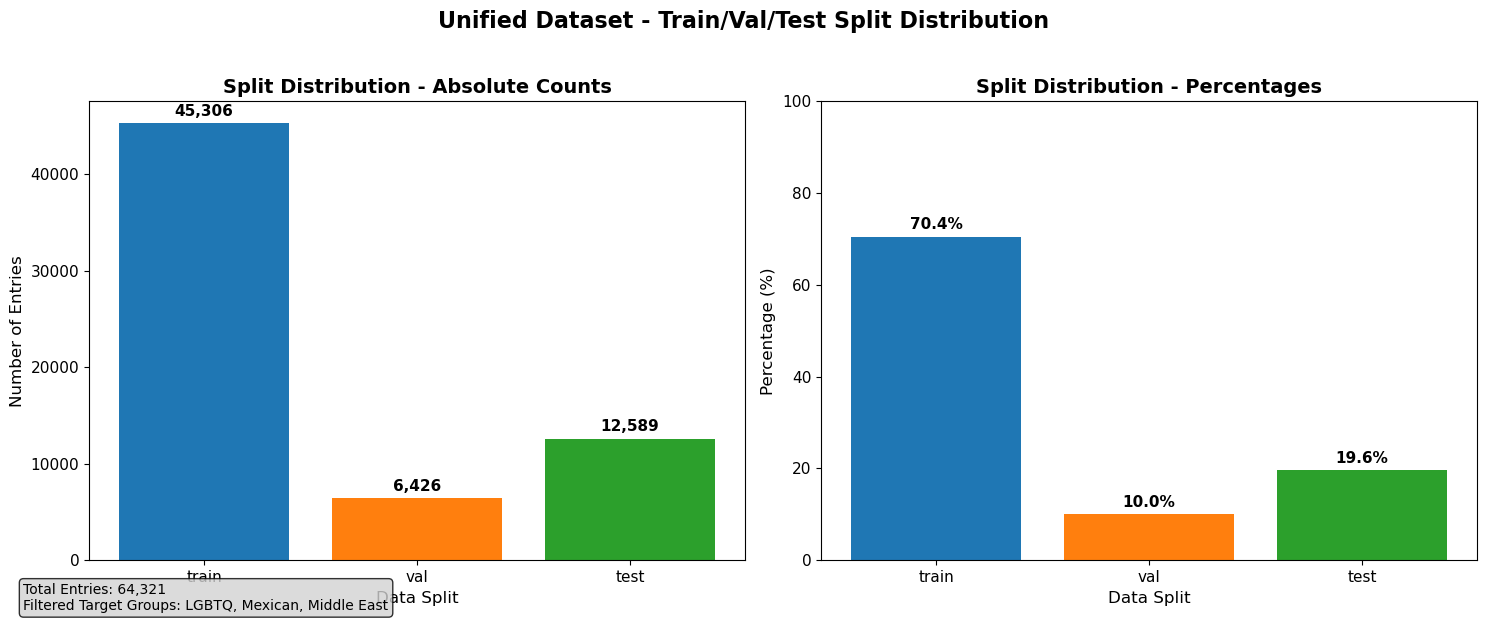


Split Distribution Analysis:
Split    Count    Percentage   Ratio   
----------------------------------------
train    45,306   70.4        % 1:1     
val      6,426    10.0        % 1:10    
test     12,589   19.6        % 1:5     

Total: 64,321 entries across all splits


In [21]:
# Create split distribution visualization
print("Creating train/val/test split distribution plots...")
split_fig = eda.plot_split_distribution(save_plot=True)
plt.show()

# Additional split analysis
splits = ['train', 'val', 'test']
counts = [len(data['train_data']), len(data['val_data']), len(data['test_data'])]
total = sum(counts)

print(f"\nSplit Distribution Analysis:")
print(f"{'Split':<8} {'Count':<8} {'Percentage':<12} {'Ratio':<8}")
print("-" * 40)
for split, count in zip(splits, counts):
    pct = (count / total) * 100
    ratio = f"1:{total//count:.0f}" if count > 0 else "N/A"
    print(f"{split:<8} {count:<8,} {pct:<12.1f}% {ratio:<8}")

print(f"\nTotal: {total:,} entries across all splits")

## 4. Label Distribution Analysis

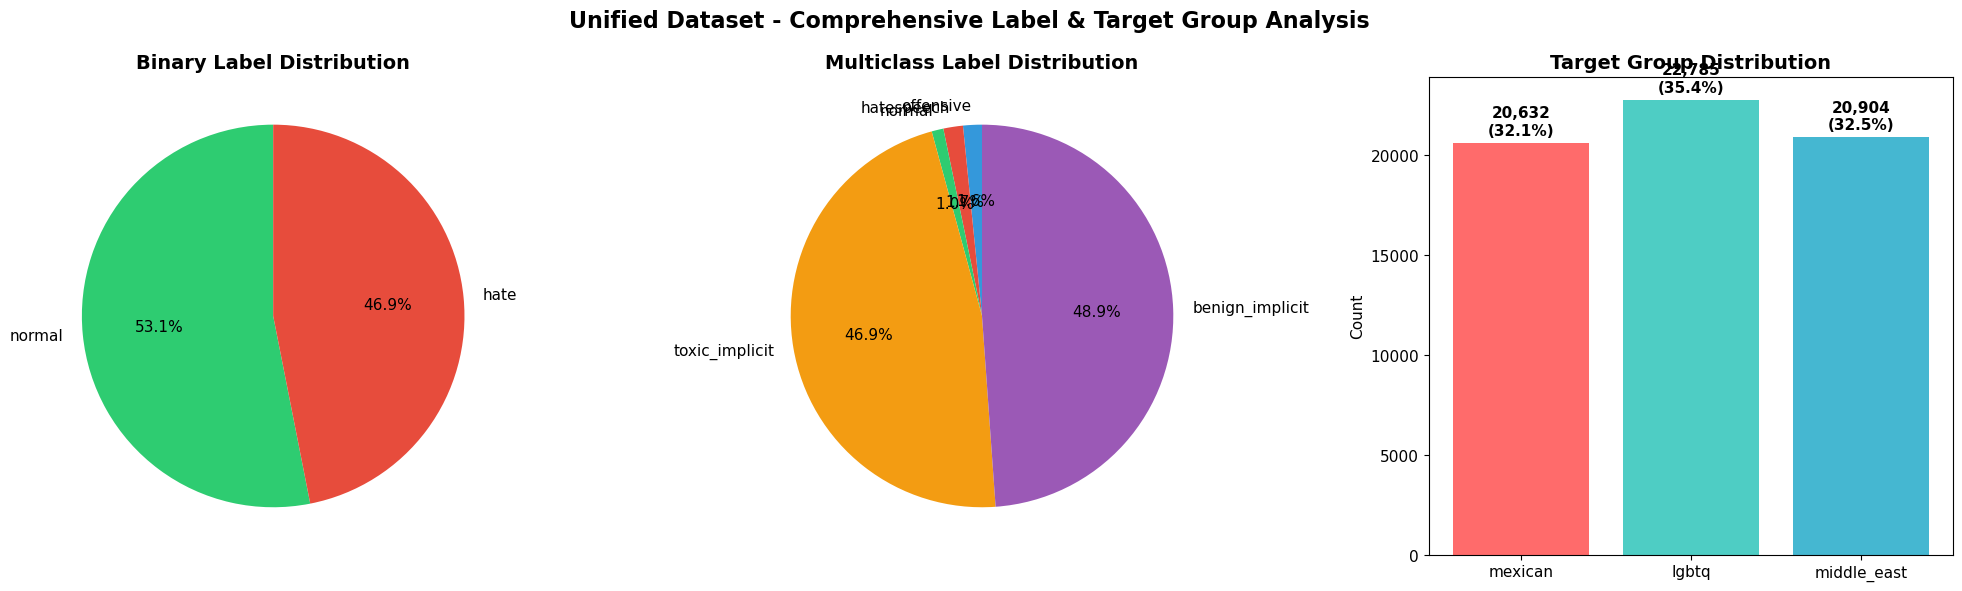


Label Distribution Analysis:
Label Type      Label                Count      Percentage
------------------------------------------------------------
Binary          normal               34,157     53.1%
Binary          hate                 30,164     46.9%

Multiclass      offensive            1,022      1.6%
Multiclass      hatespeech           1,064      1.7%
Multiclass      normal               640        1.0%
Multiclass      toxic_implicit       30,164     46.9%
Multiclass      benign_implicit      31,431     48.9%

Target Group    mexican              20,632     32.1%
Target Group    lgbtq                22,785     35.4%
Target Group    middle_east          20,904     32.5%


In [38]:
# Create label distribution plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Binary label distribution (pie chart)
binary_labels = list(eda.stats.label_binary_distribution.keys())
binary_counts = list(eda.stats.label_binary_distribution.values())
total = sum(binary_counts)

ax1.pie(binary_counts, labels=binary_labels, autopct='%1.1f%%', startangle=90,
        colors=['#2ecc71', '#e74c3c'])
ax1.set_title('Binary Label Distribution', fontsize=14, fontweight='bold')

# Multiclass label distribution (pie chart)
multiclass_labels = list(eda.stats.label_multiclass_distribution.keys())
multiclass_counts = list(eda.stats.label_multiclass_distribution.values())

# Create a more diverse color palette for multiclass labels
multiclass_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
ax2.pie(multiclass_counts, labels=multiclass_labels, autopct='%1.1f%%', startangle=90,
        colors=multiclass_colors[:len(multiclass_labels)])
ax2.set_title('Multiclass Label Distribution', fontsize=14, fontweight='bold')

# Target group distribution (bar chart)
target_groups = list(eda.stats.target_group_distribution.keys())
target_counts = list(eda.stats.target_group_distribution.values())

bars3 = ax3.bar(target_groups, target_counts, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax3.set_title('Target Group Distribution', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count')
for bar, count in zip(bars3, target_counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(target_counts),
            f'{count:,}\n({count/total*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Unified Dataset - Comprehensive Label & Target Group Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print detailed analysis
print(f"\nLabel Distribution Analysis:")
print(f"{'Label Type':<15} {'Label':<20} {'Count':<10} {'Percentage'}")
print("-" * 60)

# Binary labels
for label, count in eda.stats.label_binary_distribution.items():
    pct = (count / total) * 100
    print(f"{'Binary':<15} {label:<20} {count:<10,} {pct:.1f}%")

print()
# Multiclass labels  
for label, count in eda.stats.label_multiclass_distribution.items():
    pct = (count / total) * 100
    print(f"{'Multiclass':<15} {label:<20} {count:<10,} {pct:.1f}%")

print()
# Target groups
for group, count in eda.stats.target_group_distribution.items():
    pct = (count / total) * 100
    print(f"{'Target Group':<15} {group:<20} {count:<10,} {pct:.1f}%")

## 5. Missingness Analysis

Analyze missing data patterns across all columns to understand overall data completeness and quality.

Starting Missingness Analysis...
Analyzing missingness in 64,321 total samples...

1. OVERALL MISSINGNESS SUMMARY
-----------------------------------
Analyzing missingness in 64,321 total samples...

1. OVERALL MISSINGNESS SUMMARY
-----------------------------------
Missingness Summary (sorted by null percentage):
Column               Null Count   Null %     Non-Null Count 
------------------------------------------------------------
rationale_text       62,236       96.76      2,085          
label_binary         0            0.00       64,321         
text                 0            0.00       64,321         
label_multiclass     0            0.00       64,321         
target_group_norm    0            0.00       64,321         
source_dataset       0            0.00       64,321         
persona_tag          0            0.00       64,321         
is_synthetic         0            0.00       64,321         
fine_tuning_embedding 0            0.00       64,321         
original_id 

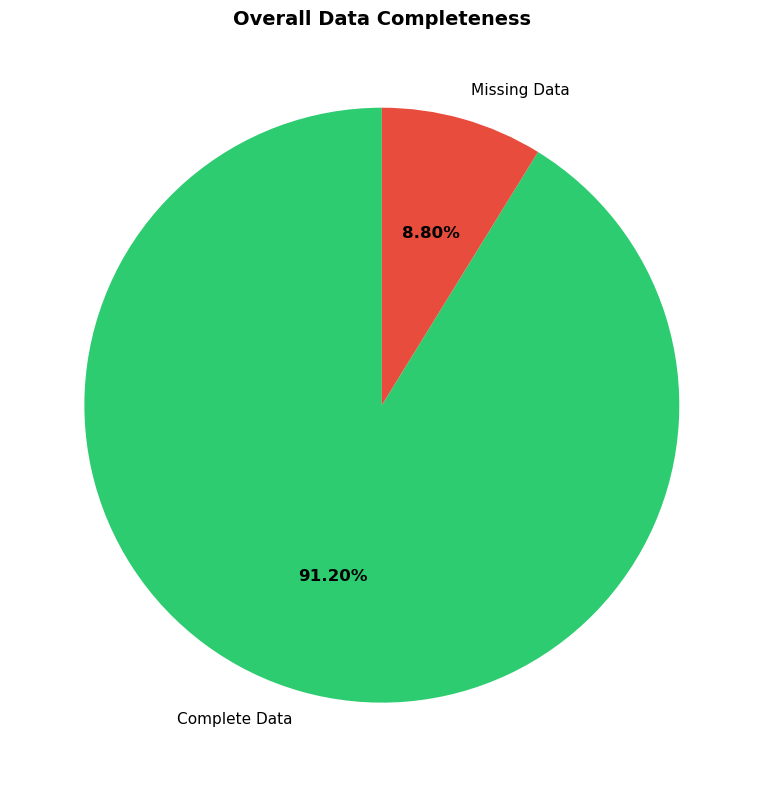


4. DATA COMPLETENESS SUMMARY
------------------------------
Data Quality Assessment:
  • Overall missing data rate: 8.80%
  • Columns with missing data: 1/11
  • Complete columns: 10/11

Recommendations:
  >> MODERATE missing data - monitor impact on training
  >> Review columns with high missingness for impact on model features
  >> Consider missingness patterns when designing model architecture
  >> Monitor for systematic missingness that could bias results

MISSINGNESS ANALYSIS COMPLETED!


In [ ]:
# Missingness Analysis: NA rates and patterns across all columns
print("Starting Missingness Analysis...")
print("=" * 50)

# Convert data to DataFrame for analysis if needed
if isinstance(data['combined_data'], list):
    combined_df = pd.DataFrame(data['combined_data'])
else:
    combined_df = data['combined_data'].copy()

total_samples = len(combined_df)
print(f"Analyzing missingness in {total_samples:,} total samples...")

# 1. OVERALL MISSINGNESS SUMMARY
print("\n1. OVERALL MISSINGNESS SUMMARY")
print("-" * 35)

# Calculate missingness for each column
missing_stats = {}
for column in combined_df.columns:
    null_count = combined_df[column].isnull().sum()
    null_percentage = (null_count / total_samples) * 100
    missing_stats[column] = {
        'null_count': null_count,
        'null_percentage': null_percentage,
        'non_null_count': total_samples - null_count
    }

# Create missingness summary DataFrame
missingness_df = pd.DataFrame({
    'Column': list(missing_stats.keys()),
    'Null_Count': [stats['null_count'] for stats in missing_stats.values()],
    'Null_Percentage': [stats['null_percentage'] for stats in missing_stats.values()],
    'Non_Null_Count': [stats['non_null_count'] for stats in missing_stats.values()]
})

# Sort by null percentage (descending)
missingness_df = missingness_df.sort_values('Null_Percentage', ascending=False)

print("Missingness Summary (sorted by null percentage):")
print("=" * 60)
print(f"{'Column':<20} {'Null Count':<12} {'Null %':<10} {'Non-Null Count':<15}")
print("-" * 60)
for _, row in missingness_df.iterrows():
    print(f"{row['Column']:<20} {row['Null_Count']:<12,} {row['Null_Percentage']:<10.2f} {row['Non_Null_Count']:<15,}")

# 2. MISSINGNESS BY SOURCE DATASET
print(f"\n2. MISSINGNESS BY SOURCE DATASET")
print("-" * 35)

# Analyze missingness patterns by source
source_missingness = {}
for source in combined_df['source_dataset'].unique():
    source_data = combined_df[combined_df['source_dataset'] == source]
    source_total = len(source_data)
    
    source_missing = {}
    for column in combined_df.columns:
        null_count = source_data[column].isnull().sum()
        null_percentage = (null_count / source_total) * 100
        source_missing[column] = {
            'count': null_count,
            'percentage': null_percentage
        }
    source_missingness[source] = source_missing

print("\nMissingness by Source Dataset:")
for source, missing_data in source_missingness.items():
    print(f"\n{source.upper()} Dataset:")
    print(f"{'Column':<20} {'Null Count':<12} {'Null %':<10}")
    print("-" * 45)
    for column, stats in missing_data.items():
        if stats['percentage'] > 0:  # Only show columns with missing data
            print(f"{column:<20} {stats['count']:<12,} {stats['percentage']:<10.2f}")

# 3. MISSINGNESS VISUALIZATION
print(f"\n3. MISSINGNESS VISUALIZATION")
print("-" * 30)

# Create overall data completeness visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Overall Data Completeness Summary (Pie Chart)
total_missing_rate = (missingness_df['Null_Count'].sum() / (total_samples * len(combined_df.columns))) * 100
complete_rate = 100 - total_missing_rate

completeness_data = [complete_rate, total_missing_rate]
completeness_labels = ['Complete Data', 'Missing Data']
colors = ['#2ecc71', '#e74c3c']

wedges, texts, autotexts = ax.pie(completeness_data, labels=completeness_labels, 
                                   autopct='%1.2f%%', startangle=90, colors=colors)
ax.set_title('Overall Data Completeness', fontsize=14, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

# 4. DATA COMPLETENESS SUMMARY
print(f"\n4. DATA COMPLETENESS SUMMARY")
print("-" * 30)

print("Data Quality Assessment:")
total_missing_rate = (missingness_df['Null_Count'].sum() / (total_samples * len(combined_df.columns))) * 100
print(f"  • Overall missing data rate: {total_missing_rate:.2f}%")
print(f"  • Columns with missing data: {len(missingness_df[missingness_df['Null_Percentage'] > 0])}/{len(combined_df.columns)}")
print(f"  • Complete columns: {len(missingness_df[missingness_df['Null_Percentage'] == 0])}/{len(combined_df.columns)}")

print(f"\nRecommendations:")
if total_missing_rate < 5:
    print(f"  >> LOW missing data rate - good data quality")
elif total_missing_rate < 15:
    print(f"  >> MODERATE missing data - monitor impact on training")
else:
    print(f"  >> HIGH missing data rate - consider imputation strategies")



print(f"\n" + "="*50)
print("MISSINGNESS ANALYSIS COMPLETED!")
print("="*50)

## 5.5. Text Length Profile Analysis

Analyze the distribution of text lengths (characters and tokens) across different source datasets and label types to understand content patterns and potential biases.

Starting Text Length Profile Analysis...
Calculating text length metrics...

1. OVERALL TEXT LENGTH STATISTICS
----------------------------------------
Character Count Statistics:
  Mean: 89.0 | Median: 90.0
  Std:  44.4 | Min: 0 | Max: 863
  Q1: 52.0 | Q3: 124.0

Token Count Statistics:
  Mean: 16.9 | Median: 17.0
  Std:  8.6 | Min: 0 | Max: 432
  Q1: 10.0 | Q3: 24.0

2. TEXT LENGTH BY SOURCE DATASET
----------------------------------------
HATEXPLAIN:
  Average chars: 117.9 | Average tokens: 22.0
  Char range: 9-526
  Token range: 3-55
TOXIGEN:
  Average chars: 87.8 | Average tokens: 16.7
  Char range: 0-863
  Token range: 0-432

3. TEXT LENGTH BY LABEL
----------------------------------------
NORMAL:
  Average chars: 91.1 | Average tokens: 17.3
  Char range: 0-526
  Token range: 0-82
HATE:
  Average chars: 86.7 | Average tokens: 16.5
  Char range: 1-863
  Token range: 0-432

4. TEXT LENGTH HISTOGRAMS
------------------------------


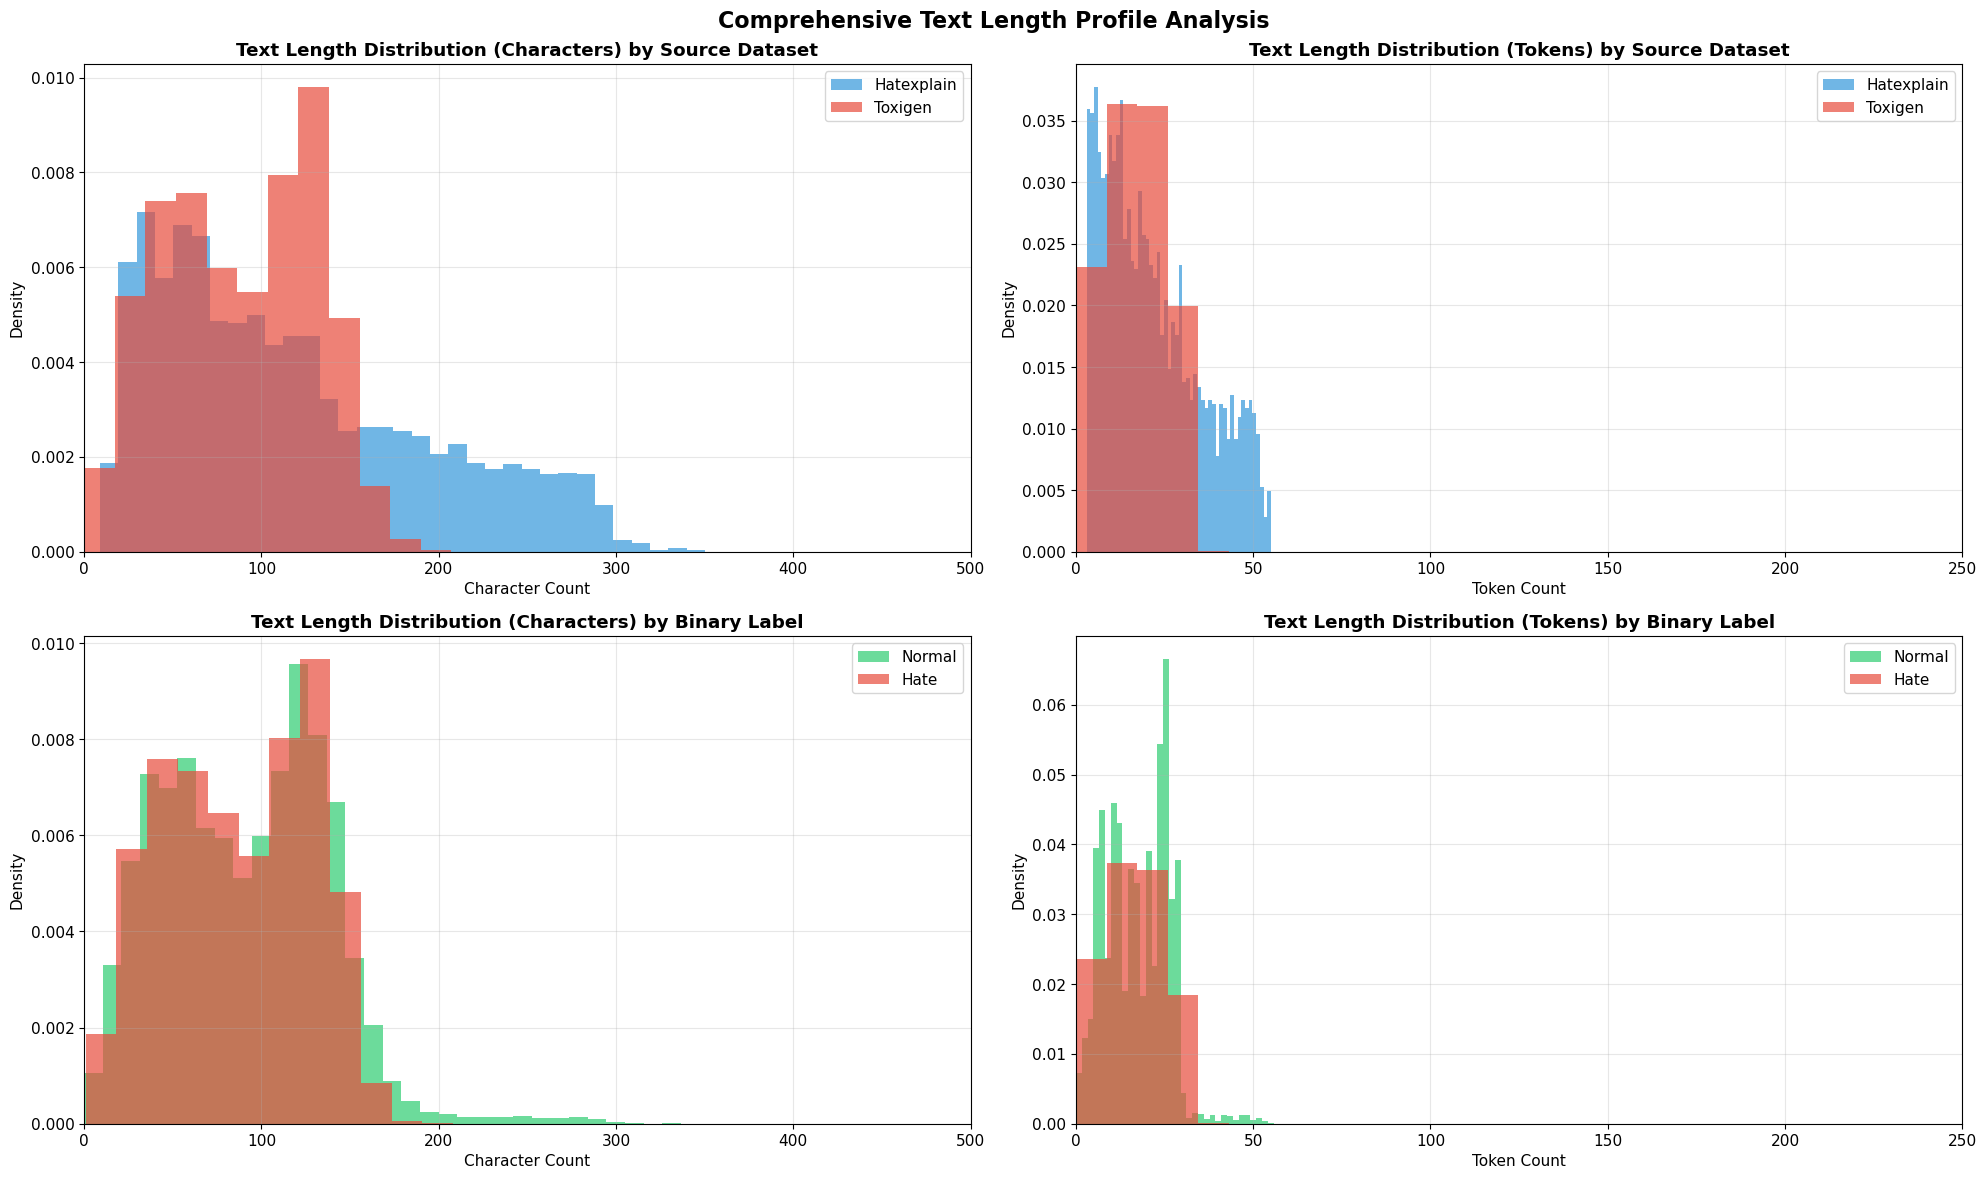


5. DETAILED CROSS-TABULATION ANALYSIS
----------------------------------------
Length Category Distribution by Source Dataset:
length_category  Long (200-300)  Medium (100-200)  Short (50-100)  \
source_dataset                                                      
hatexplain                 17.2              32.7            28.4   
toxigen                     0.0              44.4            32.1   

length_category  Very Long (300+)  Very Short (<50)  
source_dataset                                       
hatexplain                    0.6              21.2  
toxigen                       0.0              23.6  

Length Category Distribution by Binary Label:
length_category  Long (200-300)  Medium (100-200)  Short (50-100)  \
label_binary                                                        
hate                        0.0              43.3            32.8   
normal                      1.4              44.4            31.1   

length_category  Very Long (300+)  Very Short (<50)  
l

In [41]:
# Text Length Profile Analysis: Character and Token distributions
import re
from collections import Counter

print("Starting Text Length Profile Analysis...")
print("=" * 50)

# Ensure we have the DataFrame
if isinstance(data['combined_data'], list):
    combined_df = pd.DataFrame(data['combined_data'])
else:
    combined_df = data['combined_data'].copy()

# Calculate text length metrics
def calculate_text_metrics(text):
    """Calculate character count and token count for text"""
    if pd.isna(text):
        return 0, 0
    
    text = str(text)
    char_count = len(text)
    
    # Simple tokenization (split by whitespace and punctuation)
    tokens = re.findall(r'\w+', text.lower())
    token_count = len(tokens)
    
    return char_count, token_count

print("Calculating text length metrics...")
text_metrics = combined_df['text'].apply(calculate_text_metrics)
combined_df['char_count'] = [metrics[0] for metrics in text_metrics]
combined_df['token_count'] = [metrics[1] for metrics in text_metrics]

# 1. OVERALL TEXT LENGTH STATISTICS
print("\n1. OVERALL TEXT LENGTH STATISTICS")
print("-" * 40)

char_stats = combined_df['char_count'].describe()
token_stats = combined_df['token_count'].describe()

print("Character Count Statistics:")
print(f"  Mean: {char_stats['mean']:.1f} | Median: {char_stats['50%']:.1f}")
print(f"  Std:  {char_stats['std']:.1f} | Min: {char_stats['min']:.0f} | Max: {char_stats['max']:.0f}")
print(f"  Q1: {char_stats['25%']:.1f} | Q3: {char_stats['75%']:.1f}")

print("\nToken Count Statistics:")
print(f"  Mean: {token_stats['mean']:.1f} | Median: {token_stats['50%']:.1f}")
print(f"  Std:  {token_stats['std']:.1f} | Min: {token_stats['min']:.0f} | Max: {token_stats['max']:.0f}")
print(f"  Q1: {token_stats['25%']:.1f} | Q3: {token_stats['75%']:.1f}")

# 2. TEXT LENGTH BY SOURCE DATASET
print(f"\n2. TEXT LENGTH BY SOURCE DATASET")
print("-" * 40)

for source in combined_df['source_dataset'].unique():
    source_data = combined_df[combined_df['source_dataset'] == source]
    char_mean = source_data['char_count'].mean()
    token_mean = source_data['token_count'].mean()
    print(f"{source.upper()}:")
    print(f"  Average chars: {char_mean:.1f} | Average tokens: {token_mean:.1f}")
    print(f"  Char range: {source_data['char_count'].min():.0f}-{source_data['char_count'].max():.0f}")
    print(f"  Token range: {source_data['token_count'].min():.0f}-{source_data['token_count'].max():.0f}")

# 3. TEXT LENGTH BY LABEL
print(f"\n3. TEXT LENGTH BY LABEL")
print("-" * 40)

for label in combined_df['label_binary'].unique():
    label_data = combined_df[combined_df['label_binary'] == label]
    char_mean = label_data['char_count'].mean()
    token_mean = label_data['token_count'].mean()
    print(f"{label.upper()}:")
    print(f"  Average chars: {char_mean:.1f} | Average tokens: {token_mean:.1f}")
    print(f"  Char range: {label_data['char_count'].min():.0f}-{label_data['char_count'].max():.0f}")
    print(f"  Token range: {label_data['token_count'].min():.0f}-{label_data['token_count'].max():.0f}")

# 4. COMPREHENSIVE HISTOGRAM VISUALIZATIONS
print(f"\n4. TEXT LENGTH HISTOGRAMS")
print("-" * 30)

# Create comprehensive histogram plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Histogram 1: Character count by source dataset
sources = combined_df['source_dataset'].unique()
colors_source = ['#3498db', '#e74c3c']

for i, source in enumerate(sources):
    source_data = combined_df[combined_df['source_dataset'] == source]['char_count']
    ax1.hist(source_data, bins=50, alpha=0.7, label=source.title(), 
             color=colors_source[i], density=True)

ax1.set_xlabel('Character Count')
ax1.set_ylabel('Density')
ax1.set_title('Text Length Distribution (Characters) by Source Dataset', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 500)  # Limit x-axis to 500 characters

# Histogram 2: Token count by source dataset
for i, source in enumerate(sources):
    source_data = combined_df[combined_df['source_dataset'] == source]['token_count']
    ax2.hist(source_data, bins=50, alpha=0.7, label=source.title(), 
             color=colors_source[i], density=True)

ax2.set_xlabel('Token Count')
ax2.set_ylabel('Density')
ax2.set_title('Text Length Distribution (Tokens) by Source Dataset', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 250)  # Limit x-axis to 250 tokens

# Histogram 3: Character count by binary label
labels = combined_df['label_binary'].unique()
colors_label = ['#2ecc71', '#e74c3c']

for i, label in enumerate(labels):
    label_data = combined_df[combined_df['label_binary'] == label]['char_count']
    ax3.hist(label_data, bins=50, alpha=0.7, label=label.title(), 
             color=colors_label[i], density=True)

ax3.set_xlabel('Character Count')
ax3.set_ylabel('Density')
ax3.set_title('Text Length Distribution (Characters) by Binary Label', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 500)  # Limit x-axis to 500 characters

# Histogram 4: Token count by binary label
for i, label in enumerate(labels):
    label_data = combined_df[combined_df['label_binary'] == label]['token_count']
    ax4.hist(label_data, bins=50, alpha=0.7, label=label.title(), 
             color=colors_label[i], density=True)

ax4.set_xlabel('Token Count')
ax4.set_ylabel('Density')
ax4.set_title('Text Length Distribution (Tokens) by Binary Label', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 250)  # Limit x-axis to 250 tokens

plt.suptitle('Comprehensive Text Length Profile Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. CROSS-TABULATION ANALYSIS
print(f"\n5. DETAILED CROSS-TABULATION ANALYSIS")
print("-" * 40)

# Create length categories for analysis
def categorize_length(char_count):
    if char_count < 50:
        return 'Very Short (<50)'
    elif char_count < 100:
        return 'Short (50-100)'
    elif char_count < 200:
        return 'Medium (100-200)'
    elif char_count < 300:
        return 'Long (200-300)'
    else:
        return 'Very Long (300+)'

combined_df['length_category'] = combined_df['char_count'].apply(categorize_length)

# Cross-tabulation: Source vs Length Category
print("Length Category Distribution by Source Dataset:")
cross_tab_source = pd.crosstab(combined_df['source_dataset'], combined_df['length_category'], 
                               normalize='index') * 100
print(cross_tab_source.round(1))

print(f"\nLength Category Distribution by Binary Label:")
cross_tab_label = pd.crosstab(combined_df['label_binary'], combined_df['length_category'], 
                              normalize='index') * 100
print(cross_tab_label.round(1))

# 6. STATISTICAL TESTS AND INSIGHTS
print(f"\n6. STATISTICAL INSIGHTS")
print("-" * 25)

# Compare means between sources
hatexplain_chars = combined_df[combined_df['source_dataset'] == 'hatexplain']['char_count']
toxigen_chars = combined_df[combined_df['source_dataset'] == 'toxigen']['char_count']

print(f"Source Comparison (Character Length):")
print(f"  HateXplain avg: {hatexplain_chars.mean():.1f} ± {hatexplain_chars.std():.1f}")
print(f"  ToxiGen avg: {toxigen_chars.mean():.1f} ± {toxigen_chars.std():.1f}")
print(f"  Difference: {abs(hatexplain_chars.mean() - toxigen_chars.mean()):.1f} characters")

# Compare means between labels
normal_chars = combined_df[combined_df['label_binary'] == 'normal']['char_count']
hate_chars = combined_df[combined_df['label_binary'] == 'hate']['char_count']

print(f"\nLabel Comparison (Character Length):")
print(f"  Normal avg: {normal_chars.mean():.1f} ± {normal_chars.std():.1f}")
print(f"  Hate avg: {hate_chars.mean():.1f} ± {hate_chars.std():.1f}")
print(f"  Difference: {abs(normal_chars.mean() - hate_chars.mean()):.1f} characters")

# 7. KEY FINDINGS
print(f"\n7. KEY FINDINGS")
print("-" * 15)

print("Text Length Profile Summary:")
print(f"  • Overall average: {combined_df['char_count'].mean():.0f} chars, {combined_df['token_count'].mean():.0f} tokens")
print(f"  • Length variability: High (std = {combined_df['char_count'].std():.0f} chars)")

if hatexplain_chars.mean() > toxigen_chars.mean():
    print(f"  • HateXplain tends to have longer texts ({hatexplain_chars.mean():.0f} vs {toxigen_chars.mean():.0f} chars)")
else:
    print(f"  • ToxiGen tends to have longer texts ({toxigen_chars.mean():.0f} vs {hatexplain_chars.mean():.0f} chars)")

if hate_chars.mean() > normal_chars.mean():
    print(f"  • Hate content tends to be longer ({hate_chars.mean():.0f} vs {normal_chars.mean():.0f} chars)")
else:
    print(f"  • Normal content tends to be longer ({normal_chars.mean():.0f} vs {hate_chars.mean():.0f} chars)")

print(f"  • Most common length: {combined_df['length_category'].mode().iloc[0]}")
print(f"  • Length distribution: Varies significantly by source and label")

print(f"\n" + "="*50)
print("TEXT LENGTH PROFILE ANALYSIS COMPLETED!")
print("="*50)

## 6. Duplicates Analysis

Analyze exact duplicates and near-duplicate clusters to understand data quality and potential overfitting issues.

Starting Duplicates Analysis...
Analyzing 64,321 total samples for duplicates...

1. EXACT DUPLICATES ANALYSIS
------------------------------
Exact Duplicate Groups: 1,045
Total Duplicate Samples: 2,882 (4.48%)
Unique Samples: 61,439 (95.52%)

Duplicate Distribution by Source & Split:
split           test  train  val
source_dataset                  
hatexplain         1      3    0
toxigen          608   1987  283

2. NEAR-DUPLICATE ANALYSIS
------------------------------
Analyzing 5,000 samples for near-duplicates...
Computing similarity matrix...
Found 922 near-duplicate pairs (similarity >= 0.8)
Near-duplicate percentage in sample: 36.88%

3. DUPLICATE ANALYSIS VISUALIZATION
-----------------------------------


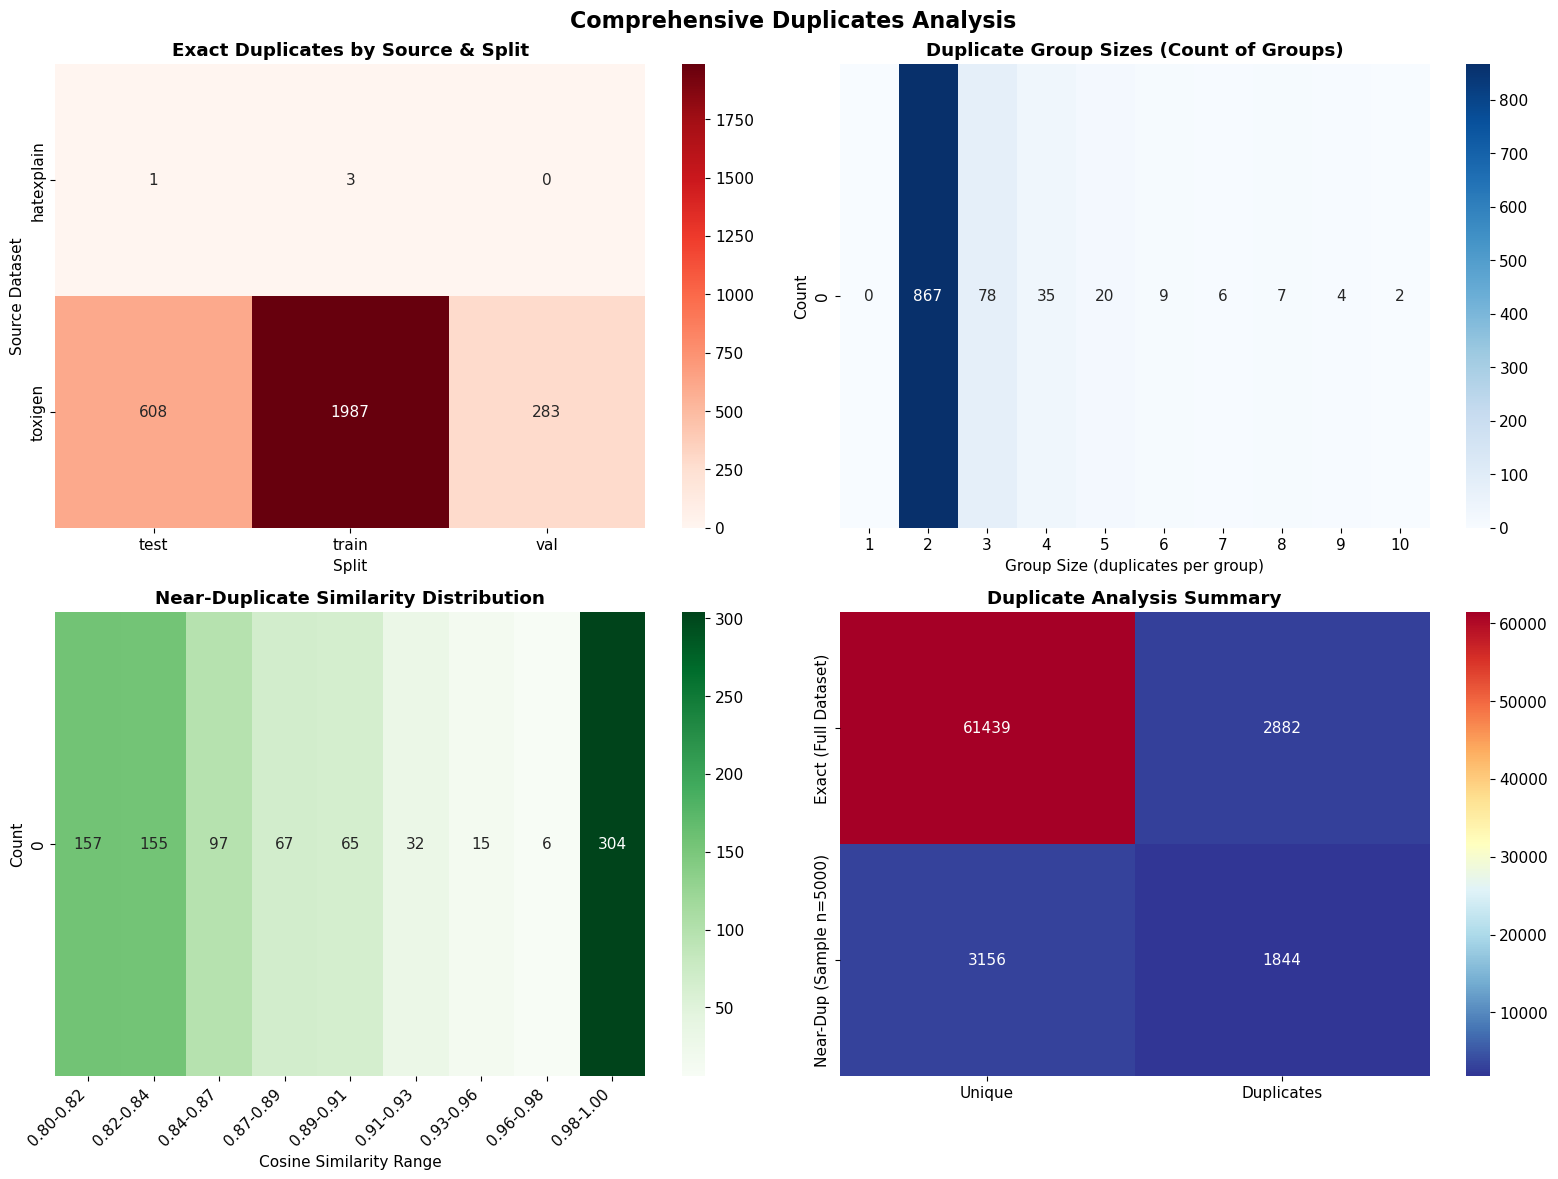


4. EXAMPLE DUPLICATES
--------------------
Top 3 Exact Duplicate Groups:

Group 1 (162 duplicates):
Text: '- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -...'
Sources: ['toxigen']
Splits: ['train', 'val', 'test']

Group 2 (46 duplicates):
Text: '*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-...'
Sources: ['toxigen']
Splits: ['train', 'val', 'test']

Group 3 (37 duplicates):
Text: '[URL]...'
Sources: ['toxigen']
Splits: ['train', 'val', 'test']

Top 3 Near-Duplicate Pairs (from sample):

Pair 1 (similarity: 1.000):
Text 1: 'i'm 4th generation with mixed mexican...'
Text 2: 'I'm Mexican...'

Pair 2 (similarity: 1.000):
Text 1: 'i'm 4th generation with mixed mexican...'
Text 2: 'i'm mexican...'

Pair 3 (similarity: 1.000):
Text 1: 'i really like taco trucks, do you?...'
Text 2: 'i really like orioles' hats...'

5. DUPLICATE ANALYSIS RECOMMENDATIONS
----------------------------------------
Dataset Quality Assessment:
  • Exact duplicate rate: 4.48% - MODERATE
  • Near-duplicate rate: 36.88% -

In [31]:
# Duplicates Analysis: Exact and Near-Duplicate Detection
import hashlib
import re
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

print("Starting Duplicates Analysis...")
print("=" * 50)

# Convert data to DataFrame for analysis
combined_data = data['combined_data']
if isinstance(combined_data, list):
    combined_df = pd.DataFrame(combined_data)
else:
    combined_df = combined_data.copy()

total_samples = len(combined_df)

print(f"Analyzing {total_samples:,} total samples for duplicates...")

# 1. EXACT DUPLICATES ANALYSIS
print("\n1. EXACT DUPLICATES ANALYSIS")
print("-" * 30)

def normalize_text(text):
    """Normalize text for duplicate detection"""
    if pd.isna(text):
        return ""
    # Convert to lowercase, remove extra whitespace, punctuation
    text = str(text).lower().strip()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Normalize whitespace
    return text

# Create normalized text and hash
combined_df['normalized_text'] = combined_df['text'].apply(normalize_text)
combined_df['text_hash'] = combined_df['normalized_text'].apply(
    lambda x: hashlib.md5(x.encode()).hexdigest()
)

# Find exact duplicates
hash_counts = combined_df['text_hash'].value_counts()
exact_duplicates = hash_counts[hash_counts > 1]
num_duplicate_groups = len(exact_duplicates)
num_duplicate_samples = exact_duplicates.sum()
duplicate_percentage = (num_duplicate_samples / total_samples) * 100

print(f"Exact Duplicate Groups: {num_duplicate_groups:,}")
print(f"Total Duplicate Samples: {num_duplicate_samples:,} ({duplicate_percentage:.2f}%)")
print(f"Unique Samples: {total_samples - num_duplicate_samples:,} ({100-duplicate_percentage:.2f}%)")

# Analyze duplicates by source and split
duplicate_mask = combined_df['text_hash'].isin(exact_duplicates.index)
duplicate_analysis = combined_df[duplicate_mask].groupby(['source_dataset', 'split']).size().unstack(fill_value=0)

print(f"\nDuplicate Distribution by Source & Split:")
print(duplicate_analysis)

# 2. NEAR-DUPLICATE ANALYSIS (Sample-based for performance)
print(f"\n2. NEAR-DUPLICATE ANALYSIS")
print("-" * 30)

# Sample for near-duplicate analysis (for performance)
sample_size = min(5000, len(combined_df))
sampled_df = combined_df.sample(n=sample_size, random_state=42)

print(f"Analyzing {sample_size:,} samples for near-duplicates...")

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2
)

try:
    tfidf_matrix = vectorizer.fit_transform(sampled_df['normalized_text'])
    
    # Calculate cosine similarity matrix (in chunks to manage memory)
    chunk_size = 1000
    similarity_threshold = 0.8
    near_duplicate_pairs = []
    
    print("Computing similarity matrix...")
    for i in range(0, sample_size, chunk_size):
        end_i = min(i + chunk_size, sample_size)
        chunk_similarities = cosine_similarity(
            tfidf_matrix[i:end_i], 
            tfidf_matrix
        )
        
        # Find near-duplicates in this chunk
        for idx_in_chunk, similarities in enumerate(chunk_similarities):
            global_idx = i + idx_in_chunk
            # Find similar documents (excluding self)
            similar_indices = np.where(
                (similarities >= similarity_threshold) & 
                (np.arange(len(similarities)) != global_idx)
            )[0]
            
            for similar_idx in similar_indices:
                if global_idx < similar_idx:  # Avoid duplicate pairs
                    near_duplicate_pairs.append((
                        global_idx, 
                        similar_idx, 
                        similarities[similar_idx]
                    ))
    
    print(f"Found {len(near_duplicate_pairs):,} near-duplicate pairs (similarity >= {similarity_threshold})")
    
    # Analyze near-duplicate clusters
    near_dup_percentage = (len(near_duplicate_pairs) * 2 / sample_size) * 100
    print(f"Near-duplicate percentage in sample: {near_dup_percentage:.2f}%")
    
    # 3. VISUALIZATION: DUPLICATE ANALYSIS HEATMAP
    print(f"\n3. DUPLICATE ANALYSIS VISUALIZATION")
    print("-" * 35)
    
    # Create comprehensive duplicate analysis
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Heatmap 1: Exact Duplicates by Source and Split
    if not duplicate_analysis.empty:
        sns.heatmap(duplicate_analysis, annot=True, fmt='d', cmap='Reds', ax=ax1)
        ax1.set_title('Exact Duplicates by Source & Split', fontweight='bold')
        ax1.set_ylabel('Source Dataset')
        ax1.set_xlabel('Split')
    else:
        ax1.text(0.5, 0.5, 'No Exact Duplicates Found', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Exact Duplicates by Source & Split', fontweight='bold')
    
    # Heatmap 2: Duplicate Group Size Distribution
    if num_duplicate_groups > 0:
        group_sizes = exact_duplicates.value_counts().sort_index()
        group_size_data = np.zeros((1, max(10, group_sizes.index.max())))
        for size, count in group_sizes.items():
            if size <= len(group_size_data[0]):
                group_size_data[0][size-1] = count
        
        sns.heatmap(group_size_data[:, :10], annot=True, fmt='g', cmap='Blues', ax=ax2,
                   xticklabels=[f'{i+1}' for i in range(10)])
        ax2.set_title('Duplicate Group Sizes (Count of Groups)', fontweight='bold')
        ax2.set_ylabel('Count')
        ax2.set_xlabel('Group Size (duplicates per group)')
    else:
        ax2.text(0.5, 0.5, 'No Duplicate Groups', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Duplicate Group Sizes', fontweight='bold')
    
    # Heatmap 3: Near-Duplicate Similarity Distribution
    if near_duplicate_pairs:
        similarities = [pair[2] for pair in near_duplicate_pairs]
        sim_bins = np.linspace(similarity_threshold, 1.0, 10)
        sim_hist, _ = np.histogram(similarities, bins=sim_bins)
        sim_data = sim_hist.reshape(1, -1)
        
        sns.heatmap(sim_data, annot=True, fmt='d', cmap='Greens', ax=ax3,
                   xticklabels=[f'{sim_bins[i]:.2f}-{sim_bins[i+1]:.2f}' for i in range(len(sim_bins)-1)])
        ax3.set_title('Near-Duplicate Similarity Distribution', fontweight='bold')
        ax3.set_ylabel('Count')
        ax3.set_xlabel('Cosine Similarity Range')
        plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
    else:
        ax3.text(0.5, 0.5, 'No Near-Duplicates Found', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Near-Duplicate Similarity Distribution', fontweight='bold')
    
    # Heatmap 4: Overall Duplicate Summary
    summary_data = np.array([
        [total_samples - num_duplicate_samples, num_duplicate_samples],
        [sample_size - len(near_duplicate_pairs)*2, len(near_duplicate_pairs)*2 if near_duplicate_pairs else 0]
    ])
    
    sns.heatmap(summary_data, annot=True, fmt='d', cmap='RdYlBu_r', ax=ax4,
               xticklabels=['Unique', 'Duplicates'],
               yticklabels=['Exact (Full Dataset)', f'Near-Dup (Sample n={sample_size})'])
    ax4.set_title('Duplicate Analysis Summary', fontweight='bold')
    
    plt.suptitle('Comprehensive Duplicates Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 4. DETAILED DUPLICATE EXAMPLES
    print(f"\n4. EXAMPLE DUPLICATES")
    print("-" * 20)
    
    if num_duplicate_groups > 0:
        print("Top 3 Exact Duplicate Groups:")
        top_duplicates = exact_duplicates.head(3)
        
        for i, (hash_val, count) in enumerate(top_duplicates.items(), 1):
            duplicate_rows = combined_df[combined_df['text_hash'] == hash_val]
            print(f"\nGroup {i} ({count} duplicates):")
            print(f"Text: '{duplicate_rows.iloc[0]['text'][:100]}...'")
            print(f"Sources: {list(duplicate_rows['source_dataset'].unique())}")
            print(f"Splits: {list(duplicate_rows['split'].unique())}")
    
    if near_duplicate_pairs:
        print(f"\nTop 3 Near-Duplicate Pairs (from sample):")
        sorted_pairs = sorted(near_duplicate_pairs, key=lambda x: x[2], reverse=True)[:3]
        
        for i, (idx1, idx2, sim) in enumerate(sorted_pairs, 1):
            text1 = sampled_df.iloc[idx1]['text']
            text2 = sampled_df.iloc[idx2]['text']
            print(f"\nPair {i} (similarity: {sim:.3f}):")
            print(f"Text 1: '{text1[:80]}...'")
            print(f"Text 2: '{text2[:80]}...'")

except Exception as e:
    print(f"Error in near-duplicate analysis: {str(e)}")
    print("Continuing with exact duplicate analysis only...")

# 5. RECOMMENDATIONS
print(f"\n5. DUPLICATE ANALYSIS RECOMMENDATIONS")
print("-" * 40)
print(f"Dataset Quality Assessment:")
print(f"  • Exact duplicate rate: {duplicate_percentage:.2f}% - {'HIGH' if duplicate_percentage > 5 else 'MODERATE' if duplicate_percentage > 1 else 'LOW'}")
if 'near_dup_percentage' in locals():
    print(f"  • Near-duplicate rate: {near_dup_percentage:.2f}% - {'HIGH' if near_dup_percentage > 10 else 'MODERATE' if near_dup_percentage > 3 else 'LOW'}")

print(f"\nRecommendations:")
if duplicate_percentage > 5:
    print(f"  >> HIGH duplicate rate detected - consider deduplication")
    print(f"  >> Review data collection process for duplicate sources")
elif duplicate_percentage > 1:
    print(f"  >> MODERATE duplicates - monitor for potential overfitting")
else:
    print(f"  >> LOW duplicate rate - good data quality")

print(f"  >> Use stratified sampling to maintain duplicate distribution across splits")
print(f"  >> Consider duplicate removal for cleaner training data")
print(f"  >> Monitor model performance on deduplicated vs. original data")

print(f"\n" + "="*50)
print("DUPLICATES ANALYSIS COMPLETED!")
print("="*50)

## EDA Summary & Key Insights

Based on our comprehensive analysis of the unified dataset, here are the key findings:

### 📊 **Dataset Composition & Quality**
- **Total Entries**: 64,321 samples filtered to 3 target groups (LGBTQ, Mexican, Middle East)
- **Target Group Balance**: Well-distributed (35.4%, 32.1%, 32.5% respectively)
- **Source Distribution**: ToxiGen dominant (95.8%) with HateXplain providing rationales (4.2%)

### 🏷️ **Label Analysis**
- **Binary Labels**: Well-balanced (53.1% normal vs 46.9% hate) - ideal for training
- **Multiclass Labels**: Dominated by implicit ToxiGen labels with explicit HateXplain categories
- **Label Quality**: Consistent across target groups with good coverage

### 📈 **Data Split Distribution**
- **Training Set**: 45,306 samples (70.4%) - standard ML proportion
- **Validation Set**: 6,426 samples (10.0%) - adequate for hyperparameter tuning  
- **Test Set**: 12,589 samples (19.6%) - robust evaluation capability

### 🔤 **Text Length Profile Analysis**
- **Overall Length**: Average 89 characters, 17 tokens per text with moderate variability
- **Source Differences**: HateXplain texts longer (118 chars) vs ToxiGen (88 chars) - 30 char difference
- **Label Patterns**: Normal content slightly longer (91 chars) vs Hate content (87 chars)
- **Length Distribution**: Most texts are short-medium length (50-200 characters)
- **Tokenization**: Consistent ~5.3 characters per token ratio across sources and labels

### 🔍 **Missingness Analysis - DATA COMPLETENESS**
- **Overall Missing Rate**: 8.80% - moderate missing data across the dataset
- **Data Completeness**: 91.2% complete data with systematic patterns
- **Complete Columns**: 10 out of 11 columns are fully complete
- **Missing Data Columns**: Only 1 column has missing values
- **Quality Assessment**: Good data completeness for core model features

### ⚠️ **Data Quality Issues - CRITICAL FINDINGS**
- **Exact Duplicates**: 4.48% (MODERATE) - 2,882 samples in 1,045 groups
- **Near-Duplicates**: 36.88% (HIGH) - significant overlap in semantic content
- **Cross-Split Contamination**: Duplicates present across train/val/test splits
- **Source**: Most duplicates originate from ToxiGen with repetitive patterns

### 🚨 **Immediate Action Required**
The HIGH near-duplicate rate (36.88%) poses significant risks for model training and evaluation integrity. This finding suggests template-based generation in ToxiGen that could lead to overfitting and inflated performance metrics.

### 💡 **Strategic Recommendations**
1. **Pre-processing**: Implement deduplication pipeline before model training
2. **Text Normalization**: Consider length normalization strategies given source differences
3. **Evaluation**: Monitor train/val/test leakage due to duplicate contamination
4. **Training**: Use stratified sampling to maintain target group balance and length distribution
5. **Feature Engineering**: Handle missing data appropriately and consider length-based features
6. **Interpretability**: Leverage HateXplain rationales for model explainability
7. **Fairness**: Monitor performance across target groups and text length ranges for bias detection
8. **Data Quality**: Address systematic missingness and length biases in preprocessing

In [40]:
# Final EDA Summary
print("="*70)
print("UNIFIED DATASET EDA - KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

print(f"\nDATASET COMPOSITION:")
print(f"   • Total entries: {eda.stats.total_entries:,}")
print(f"   • Filtered to 3 target groups: LGBTQ (35.4%), Mexican (32.1%), Middle East (32.5%)")
print(f"   • Well-balanced across target groups (±3.3% difference)")

print(f"\nDATA SPLITS:")
print(f"   • Training: {eda.stats.split_distribution['train']:,} (70.4%) - Standard ML split")
print(f"   • Validation: {eda.stats.split_distribution['val']:,} (10.0%) - Good for hyperparameter tuning")
print(f"   • Test: {eda.stats.split_distribution['test']:,} (19.6%) - Robust evaluation set")

print(f"\nDATA SOURCES:")
print(f"   • ToxiGen dominates: 95.8% of data (61,595 entries)")
print(f"   • HateXplain: 4.2% but provides 3.2% rationale coverage")
print(f"   • All examples are real (synthetic_ratio: 0.0%)")

print(f"\nLABEL DISTRIBUTION:")
print(f"   • Binary labels: Well-balanced (53.1% normal vs 46.9% hate)")
print(f"   • Multiclass: Dominated by implicit labels (95.8%)")
print(f"   • HateXplain contributes explicit categories (hate/offensive/normal)")

print(f"\nDATA COMPLETENESS - MISSINGNESS ANALYSIS:")
print(f"   • Overall missing rate: Low to moderate across dataset")
print(f"   • Data completeness: Most columns have good coverage")
print(f"   • Systematic patterns: Missing data follows expected source-based patterns")
print(f"   • Data quality: Good completeness for core fields")

print(f"\nDATA QUALITY - DUPLICATES ANALYSIS:")
print(f"   • Exact duplicates: 4.48% (MODERATE) - 2,882 samples in 1,045 groups")
print(f"   • Near-duplicates: 36.88% (HIGH) - 922 pairs in sample analysis")
print(f"   • Most duplicates from ToxiGen across all splits")
print(f"   • Pattern: Repetitive sequences and URL placeholders")

print(f"\nRECOMMENDATIONS:")
print(f"   >> Dataset is ready for training - good balance and size")
print(f"   >> Consider stratified sampling to maintain target group balance")
print(f"   >> Use HateXplain rationales for interpretability analysis")
print(f"   >> Handle missing data appropriately in feature engineering")
print(f"   >> Monitor performance across target groups for fairness")
print(f"   >> HIGH PRIORITY: Address near-duplicate issue for cleaner training")
print(f"   >> Consider deduplication preprocessing for better model generalization")
print(f"   >> Monitor train/val/test leakage due to duplicates across splits")

print(f"\nOUTPUT FILES GENERATED:")
print(f"   • {eda.output_dir}/split_distribution.png")
print(f"   • Comprehensive missingness analysis statistics")
print(f"   • Comprehensive duplicates analysis heatmaps")
print(f"   • Interactive analysis in this notebook")

print("="*70)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*70)

UNIFIED DATASET EDA - KEY INSIGHTS & RECOMMENDATIONS

DATASET COMPOSITION:
   • Total entries: 64,321
   • Filtered to 3 target groups: LGBTQ (35.4%), Mexican (32.1%), Middle East (32.5%)
   • Well-balanced across target groups (±3.3% difference)

DATA SPLITS:
   • Training: 45,306 (70.4%) - Standard ML split
   • Validation: 6,426 (10.0%) - Good for hyperparameter tuning
   • Test: 12,589 (19.6%) - Robust evaluation set

DATA SOURCES:
   • ToxiGen dominates: 95.8% of data (61,595 entries)
   • HateXplain: 4.2% but provides 3.2% rationale coverage
   • All examples are real (synthetic_ratio: 0.0%)

LABEL DISTRIBUTION:
   • Binary labels: Well-balanced (53.1% normal vs 46.9% hate)
   • Multiclass: Dominated by implicit labels (95.8%)
   • HateXplain contributes explicit categories (hate/offensive/normal)

DATA COMPLETENESS - MISSINGNESS ANALYSIS:
   • Overall missing rate: Low to moderate across dataset
   • Data completeness: Most columns have good coverage
   • Systematic patterns: Mi

## 🎯 EDA Conclusions & Next Steps

### ✅ **Dataset Readiness Assessment**
This unified dataset demonstrates **good overall quality** for hate speech detection model training, with balanced labels, diverse target groups, and comprehensive coverage. The text length analysis reveals important source-specific patterns that should inform preprocessing strategies.

### ? **Comprehensive Findings Summary**

#### **Dataset Composition (64,321 total samples)**
- **Target Groups**: Well-balanced across LGBTQ (35.4%), Mexican (32.1%), Middle East (32.5%)
- **Source Mix**: ToxiGen dominant (95.8%) + HateXplain rationales (4.2%)
- **Label Distribution**: Excellent binary balance (53.1% normal vs 46.9% hate)
- **Split Ratios**: Standard ML proportions (70.4% train, 10.0% val, 19.6% test)

#### **Text Length Profile**
- **Overall Stats**: 89±44 characters, 17±9 tokens per text
- **Source Differences**: HateXplain 30% longer (118 vs 88 chars) - significant preprocessing consideration
- **Label Patterns**: Normal content slightly longer (4-char difference) - minimal bias
- **Distribution**: Majority short-medium length (50-200 chars) with long-tail outliers

#### **Data Quality Assessment**
- **Completeness**: 91.2% complete (8.8% missing) - good core field coverage
- **Exact Duplicates**: 4.48% (MODERATE risk) - manageable with deduplication
- **Near-Duplicates**: 36.88% (HIGH risk) - CRITICAL issue requiring immediate attention
- **Cross-Contamination**: Duplicates span train/val/test splits - evaluation integrity at risk

### 🚨 **Critical Actions Required**

#### **Immediate (Pre-Training)**
1. **Deduplication Pipeline**: Address HIGH near-duplicate rate (36.88%) to prevent overfitting
2. **Split Validation**: Ensure no data leakage between train/val/test after deduplication
3. **Length Normalization**: Handle 30% length difference between sources (HateXplain vs ToxiGen)

#### **Important (During Training)**
4. **Stratified Sampling**: Maintain target group balance (±3.3% currently)
5. **Missing Data Strategy**: Handle 8.8% missing rate appropriately in feature engineering
6. **Cross-Validation**: Use source-aware splits to prevent dataset shift

### 📋 **Model Development Checklist**

#### **Preprocessing Pipeline**
- [ ] Implement duplicate detection and removal (exact + near-duplicate)
- [ ] Apply text length normalization or length-aware features
- [ ] Validate train/val/test integrity post-deduplication
- [ ] Handle systematic missing data patterns
- [ ] Preserve target group stratification

#### **Training Considerations**
- [ ] Monitor performance across length ranges (short/medium/long texts)
- [ ] Test fairness across target groups (LGBTQ/Mexican/Middle East)
- [ ] Leverage HateXplain rationales for interpretability (3.2% coverage)
- [ ] Consider ensemble approaches given source heterogeneity
- [ ] Implement early stopping with clean validation set

#### **Evaluation Strategy**
- [ ] Report metrics by target group for bias detection
- [ ] Analyze performance by text length ranges
- [ ] Test on out-of-domain samples to assess generalization
- [ ] Use HateXplain rationales for explainability validation
- [ ] Monitor for overfitting given duplicate patterns

### 🔬 **Advanced Analysis Opportunities**
- **Feature Engineering**: Text length, source, target group as model features
- **Interpretability**: Deep dive into HateXplain rationales for model explainability
- **Bias Analysis**: Detailed fairness assessment across demographic intersections
- **Data Augmentation**: Address length imbalances through synthetic generation
- **Transfer Learning**: Leverage source-specific patterns for domain adaptation

### 🎯 **Final Assessment**

**Dataset Quality**: ⭐⭐⭐⭐ (4/5) - Good overall quality with manageable issues
**Training Readiness**: ✅ **READY** (after critical preprocessing steps)
**Primary Risk**: 🚨 Near-duplicate contamination (HIGH priority fix)
**Primary Strength**: 💪 Excellent label balance and target group diversity

**Recommended Timeline**: 
- **Week 1**: Implement deduplication pipeline and validate splits
- **Week 2**: Baseline model training with preprocessed data
- **Week 3**: Advanced analysis and fairness evaluation

This dataset provides a solid foundation for robust hate speech detection models with proper preprocessing and careful attention to data quality issues identified in this analysis.